# Homework 01 - Implementing and Training an MLP

### 1. Packages

In [15]:
import numpy as np
import sklearn
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import random
from random import randint
import math

### 2. Multi-Layer Perceptron


#### 2.1. Data

[([[179, 42, 136, 218, 149, 32, 197, 162],
   [253, 141, 3, 147, 148, 34, 20, 239],
   [81, 161, 234, 59, 107, 95, 92, 0],
   [139, 16, 31, 118, 26, 122, 34, 192],
   [164, 133, 219, 112, 255, 95, 77, 221],
   [108, 102, 130, 18, 91, 137, 37, 29],
   [12, 61, 78, 104, 135, 65, 118, 46],
   [41, 255, 70, 173, 80, 98, 114, 69]],
  [9, 9, 7, 7, 7, 7, 7, 6]),
 ([[52, 208, 28, 177, 180, 114, 239, 228],
   [62, 75, 204, 52, 215, 243, 38, 193],
   [237, 40, 197, 223, 240, 4, 95, 215],
   [33, 141, 71, 186, 173, 1, 230, 215],
   [151, 24, 99, 165, 234, 75, 168, 132],
   [10, 222, 117, 24, 167, 87, 199, 162],
   [100, 190, 200, 73, 61, 149, 169, 252],
   [203, 19, 138, 89, 2, 229, 221, 94]],
  [7, 4, 2, 7, 0, 5, 0, 8]),
 ([[152, 247, 143, 162, 151, 161, 131, 11],
   [86, 40, 231, 171, 184, 57, 97, 99],
   [214, 128, 236, 68, 184, 123, 250, 150],
   [25, 203, 109, 30, 122, 84, 244, 94],
   [143, 214, 9, 34, 157, 103, 38, 135],
   [205, 190, 5, 130, 78, 95, 23, 190],
   [35, 174, 112, 217, 243, 2

<Figure size 640x480 with 0 Axes>

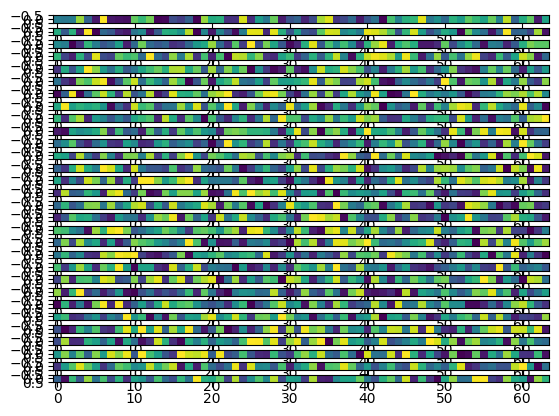

In [16]:
# load data
x = 30

def make_data(x):
    t = []
    input = []
    for i in range(x):
        d = list(list(randint(0,255) for i in range(8)) for ii in range(8))
        target = list(randint(0,9) for i in range(8))
        input.append(d)
        t.append(tuple((d, target)))
    return input, t
# print(t)
input, tup = make_data(x)

# print(tup)
oneHot = []
# # make tuples
# for i in range(len(t[0])):
#     # print(t[0][i])
#     # print(t[1][i])
#     # tup = tuple((t[0][i].append([i])))
#     tup = t[0][i]
#     # tup.append(t[1][i])
#     # print(tup)
#     oneHot.append(tup)

# print(tuples)

# Plot images
plt.figure()
n = 5
# y = x//n
# if y*n != x:
#     y += 1
# f, ax = plt.subplots(y, n)
f, ax = plt.subplots(x, 1)
ax = ax.flatten()
for i, it in enumerate(ax):
    if i == x:
        break
    # it.imshow(np.array(input[i]))
    s64 = np.array(input[i]).reshape((1, 64))
    it.imshow(np.array(s64))
    
def generator(tuples, minibatchsize=10):
    random.shuffle(tuples)
    return tuples

generator(tup)
# plt.imshow()
# s64 = np.array(input).reshape((1,64))
# plt.imshow(np.array(s64))

#### 2.2. Sigmoid Activation Function

In [17]:
class sigmoidAF:
    # inputs = ndarrays[minibatchsize, num_units]
    def __init__(self, inputs, num):
        self.inputs = inputs
        self.sigmoid = 1 // (1 + np.exp(-num))
    def get_value(self):
        return self.sigmoid


#### 2.3. Softmax activation function

In [18]:
class softmax:
    def __init__(self, input, target):
        # k = size of input vector
        k = len(input)
        zi = 1
        s = []
        for j in range(k):
            # z = preactivation
            zj = target[j]
            s.append(np.exp(zj))
        self.value = np.exp(zi)//sum(s)
        # print("calculation done")
        # print(self.value)
    
    def get_value(self):
        # print("in get")
        # print(self.value)
        return self.value
# print(input[0])
# print(len(target))
print(len(tup[0]))
for i in range(len(tup[0])):
    print(softmax(input[i], tup[1][i]).get_value())

2
[0. 0. 0. 0. 0. 0. 0. 0.]
0.0


#### 2.4. MLP weights

In [19]:
class MLPweights:
    '''
    variables: 
    - activation function: (sigmoidAF, softmax)
    - perceptrons: number of units in this layer
    - input size: number of units in the preceding layer
    - weights: tuple with both mu and sigma (default values set to mu=0. and sigma=0.2)
    - bias: default value set to 0
    '''
    def __init__(self, act_funct, perceptrons, input_size, weights=(0.,0.2), bias=0):
        self.self = self
        self.act_funct = act_funct
        self.perceptrons = perceptrons
        self.input_size = input_size
        self.mu = weights[0]
        self.sigma = weights[1]
        self.mbsize = []

    def get_mbsize(self):
        return np.array(self.mbsize)

    '''
    variables: input: ndarray(minibatchsize, input_size)
    
    return: ndarray with applied weights
    
    '''  
    def forward(self, input):
        mbsize = []
        num_units = 0
        # print("In forward")
        for x in input[0]:
            # print("in for loop")
            # print("x: ", x)
            # print("input[1] list: ", input[1])
            print(mbsize)
            for y in input[1]:
                multipl = x*y
                # print("multipl: ", multipl)
                self.mbsize.append(multipl)
            num_units += 1
        return mbsize, num_units

# print(tup[0][1])
# mlp = MLPweights((tup[0][i], tup[1][i]))
# for i in range(len(tup[0])):
#     mlp = MLPweights((0,0), 0, 0)
#     if i == 0:
#         mlp = MLPweights((tup[0][i], tup[1][i]), len(tup[0][i]), len(tup[0][i]))
#     else: 
#         mlp = MLPweights((tup[0][i], tup[1][i]), len(tup[0][i]), len[0][i-1])
            
#     print(mlp.forward((tup[0][i], tup[1][i])))

#### 2.5. Putting together the MLP

In [20]:
class MLP:
    def __init__(self, input, layers, size_layers):
        self.self = self
        self.input = input
        self.layers = layers
        self.size_layers = size_layers
        self.activation = softmax(input[0], input[1])
        self.values = []
        self.MLP = []
        self.dBack = [{}] * self.size_layers
        for i in range(len(input[0])):
            MLPw = MLPweights(self.activation, self.layers, self.size_layers)
            self.values.append(MLPw)
            
    def get_values(self):
        return np.ndarray(self.values)


#### 2.6. CCE Loss function

In [21]:
class Loss_funct:
    def __init__(self, true, predicted):
        self.self = self
        self.true = true
        self.predicted = predicted
        self.loss = 0
        self.bloss = 0
        self.cross_entropy(self.true, self.predicted)
        
    def cross_entropy(self, tru, pred):
        print(tru)
        for i in range(len(tru)):
            self.loss -= tru[i] * np.log(pred[i])
        return self.loss

### 3. Backpropagation

#### 3.1. CCE Backwards

In [22]:
'''
variables: 
- pred: inputs prediction of shape (minibatch_size, 10)
- loss: LCCE of shape (minibatch_size, 1)

return: matrix of shape (minibatch_size, 1)
'''
class Back_loss(Loss_funct):
    def CCE_back(self):
        self.bloss = self.loss/np.diff(self.predicted)
        return self.bloss

#### 3.2. Sigmoid Backwards

In [23]:
'''
child class of sigmoidAF with parent properties + back_sigmoid() function

variables: 
- preactivation: shape (minibatch_size, num_units)
- activation: 
- erSignal: error signal (dL/dactivation)

return: sigmoid backwards function result
'''
class back_sigmoid(sigmoidAF):
    def back_sigmoid(self, erSignal):
        preactivation = self.inputs # list
        activation = self.sigmoid # integer 1 or 0
        loss = erSignal.CCE_back()
        return (activation//np.diff(preactivation))*loss

#### 3.3. MLP Layer weights backwards

In [24]:
'''
child class of MLPweights with parent properties + back_weights() function

variables: 

return: 
'''
class back_MLPweight(MLPweights):
    def back_weights(self, dLdpre, preactivation):
        # dLdpre = back_sigmoid(preactivation, activation, erSignal)
        dpre = np.diff(preactivation)
        dweights = np.diff(self.get_mbsize()[:len(dpre)+1])
        dLdW = dpre * (dpre/dweights)
        print(self.perceptrons)
        dLdInput = dLdpre * (np.diff(preactivation)/self.perceptrons)
        return dLdW, dLdInput

#### 3.4. MLP Layer backwards

In [25]:
'''
function
'''
def back_Layer(self, preactivation, activation, erSignal):
    bSig = back_sigmoid(preactivation, activation, erSignal)
    return back_MLPweight(bsig, preactivation)

#### 3.5. Gradient Tape and MLP backward

In [26]:
'''
child class of MLP

variables: 
- input: 
'''
import string
class BackMLP(MLP):
    def back_MLP(self):
        for i in range(len(self.input[0])):
            activ = back_sigmoid((self.input[0][i], self.input[1][i]), self.input[0][i])
            if i > 0:
                print("backMLP: ", self.input[i])
                erSignal = Back_loss(self.input[i], self.input[i-1])
                self.dBack[i] = {i:erSignal}
                activation = activ.back_sigmoid(erSignal)
                bMLPw = back_MLPweight(activ, len(self.input[i]), len(self.input[i-1]))
                # print("bMLPw: ", bMLPw)
                print("input[i]", self.input[i])
                print("input[i-1]", self.input[i-1])
                wValues, num = bMLPw.forward((self.input[i], self.input[i-1]))
                print("weight values: ", wValues, "num: ", num)
                bMLP, dLdInput = bMLPw.back_weights(activation, self.input[i])
                print("backMLP: ", bMLP)
                self.MLP.append(bMLP)
        

#### 3.6. Training

In [27]:
def training(mbs):
    print(len(mbs[0][0]))
    for i in range(len(mbs[0][0])):
        print("Current i = ", i)
        bMLP = BackMLP(mbs[0][i], mbs[1][i], len(mbs[1][i]))
        bmlp = bMLP.back_MLP()
        # print("bmlp length: ", len(bMLP))
        # print("bmlp: ", bMLP)
        # print("mbs length: ", len(mbs[0][i]))   
        # print("mbs: ", mbs[0][i])        
        print("bMLP.dBack: {}", bMLP.dBack[{i}])
        loss = Loss_funct(bmlp, bMLP.dBack[{i}])
        print("loss: ", string(loss))
        print("epoch: ", string(i))
        

In [28]:
training(tup)

8
Current i =  0
backMLP:  [253, 141, 3, 147, 148, 34, 20, 239]
[253, 141, 3, 147, 148, 34, 20, 239]
input[i] [253, 141, 3, 147, 148, 34, 20, 239]
input[i-1] [179, 42, 136, 218, 149, 32, 197, 162]
[]
[]
[]
[]
[]
[]
[]
[]
weight values:  [] num:  8
8
backMLP:  [-3.61905311e-01  8.00773694e-01  9.99517979e-01 -5.72836112e-05
 -4.39039222e-01  4.69517307e-03 -5.41626200e+00]
backMLP:  [81, 161, 234, 59, 107, 95, 92, 0]
[81, 161, 234, 59, 107, 95, 92, 0]
input[i] [81, 161, 234, 59, 107, 95, 92, 0]
input[i-1] [253, 141, 3, 147, 148, 34, 20, 239]
[]
[]
[]
[]
[]
[]
[]
[]
weight values:  [] num:  8
8
backMLP:  [-7.05467372e-01 -4.76740025e-01  2.62560014e+00  2.84444444e+01
 -1.55945419e-02 -7.93650794e-03  4.77140763e-01]
backMLP:  [139, 16, 31, 118, 26, 122, 34, 192]
[139, 16, 31, 118, 26, 122, 34, 192]
input[i] [139, 16, 31, 118, 26, 122, 34, 192]
input[i-1] [81, 161, 234, 59, 107, 95, 92, 0]
[]
[]
[]
[]
[]
[]
[]
[]
weight values:  [] num:  8
8
backMLP:  [  1.36052158   0.02217404  -0.31116

C:\Users\Malte\AppData\Local\Temp\ipykernel_14624\3985317082.py:13: RuntimeWarning: divide by zero encountered in log
  self.loss -= tru[i] * np.log(pred[i])


TypeError: list indices must be integers or slices, not set